In [12]:
import pandas as pd
import seaborn as sn

In [5]:
df=pd.read_csv(r'D:\Datasets\titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [9]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [11]:
df['Age'].isnull().sum()

177

<AxesSubplot:xlabel='Age'>

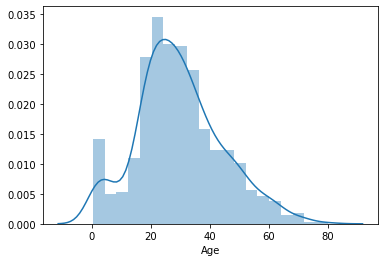

In [13]:
sn.distplot(df['Age'])

<AxesSubplot:xlabel='Age'>

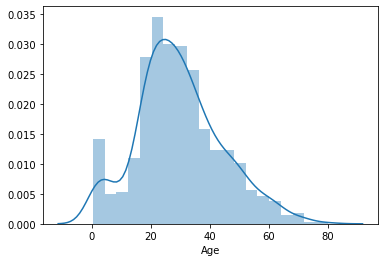

In [14]:
sn.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

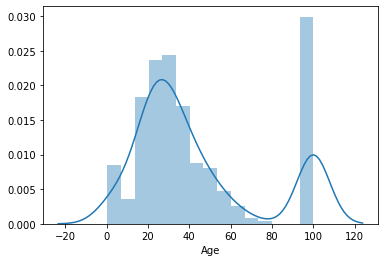

In [16]:
sn.distplot(df['Age'].fillna(100))

In [17]:
# Extreme value Analysis - if the data is normally distributed

Text(0, 0.5, 'No.of passengers')

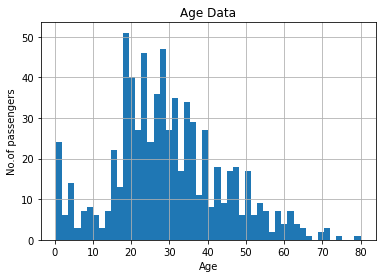

In [18]:
figure=df.Age.hist(bins=50)
figure.set_title('Age Data')
figure.set_xlabel('Age')
figure.set_ylabel('No.of passengers')

In [19]:
# Gausian Distribution - We use three standard deviation approach

In [20]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Assuming that Age follows Gausian Distribution

In [54]:
upper_boundary=df['Age'].mean()+3*df['Age'].std()

In [55]:
upper_boundary

73.27860964406094

In [25]:
lower_boundary=df['Age'].mean()-3*df['Age'].std()

In [26]:
lower_boundary

-13.880374349943303

In [27]:
# Let's Compute the interquartile range

In [30]:
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [33]:
lower_bridge=df['Age'].quantile(0.25)-(1.5*IQR)
lower_bridge

-6.6875

In [34]:
upper_bridge=df['Age'].quantile(0.75)+(1.5*IQR)
upper_bridge

64.8125

In [35]:
# Extreme Boundaries/Outliers
extreme_lower_bridge=df['Age'].quantile(0.25)-(3*IQR)
extreme_upper_bridge=df['Age'].quantile(0.75)+(3*IQR)
print(extreme_lower_bridge,extreme_upper_bridge)

-33.5 91.625


In [36]:
# so as per upper_boundary, everything after 65 is an outlier and as per extreme upper boundary, everything after 91 is an outlier

Text(0, 0.5, 'Fare Price')

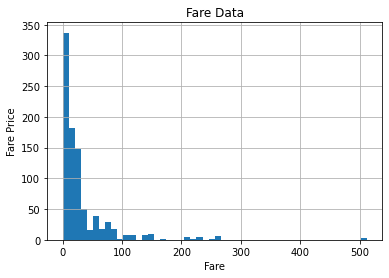

In [37]:
# Skewed Dataset
figure=df.Fare.hist(bins=50)
figure.set_title('Fare Data')
figure.set_xlabel('Fare')
figure.set_ylabel('Fare Price')

<AxesSubplot:>

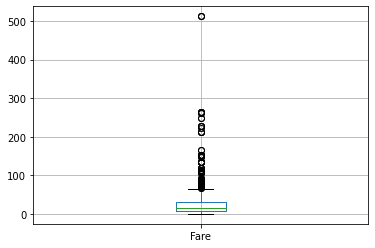

In [38]:
df.boxplot(column='Fare')

In [39]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [42]:
# Extreme Boundaries/Outliers
IQR_fare=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
extreme_lower_bridge=df['Fare'].quantile(0.25)-(3*IQR_fare)
extreme_upper_bridge=df['Fare'].quantile(0.75)+(3*IQR_fare)
print(extreme_lower_bridge,extreme_upper_bridge)

-61.358399999999996 100.2688


In [43]:
data=df.copy()

In [49]:
data.loc[data['Age']>=73,'Age']=73

In [50]:
data.loc[data['Fare']>=100,'Fare']=100

<AxesSubplot:>

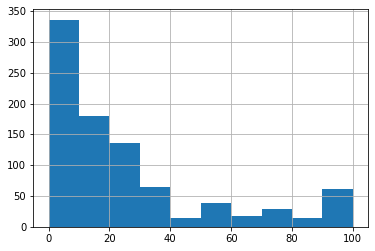

In [53]:
data['Fare'].hist()

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3,random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)

print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC Score : {}".format(roc_auc_score(y_test,y_pred)))

Accuracy Score : 0.6791044776119403
ROC AUC Score : 0.6258105238996958


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC Score : {}".format(roc_auc_score(y_test,y_pred)))

Accuracy Score : 0.6791044776119403
ROC AUC Score : 0.6258105238996958
